In [14]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import *
from FRSolver import * 

%matplotlib inline

In [15]:
# gravity
G = 1

m1 = 1
m2 = 1
m3 = 1

# position
r1 = np.array([-1,0.0,0.0], dtype="float64")
r2 = np.array([0,0.0,0.0], dtype="float64")
r3 = np.array([1,0.0,0.0], dtype="float64")

w1 = 0
w2 = np.sqrt(1.25)
# velocity 
v1 = np.array([w1,-w2,0], dtype="float64")
v2 = np.array([0,0,0], dtype="float64")
v3 = np.array([w1,w2,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2,r3])
v0s = np.array([v1,v2,v3])
masses = np.array([m1, m2, m3])

In [16]:
exs = np.linspace(-0.01,0.01,20)
eys = np.flip(np.linspace(-0.01, 0.01, 20))

In [17]:
T = 100
C = 0.4

In [18]:
E0 = np.sum(TotalEnergy(r0s, v0s, G, masses))

stabilities = []
ts = []
Es = []
variances = []
for ex in exs:
    for ey in eys:
        print(ex, ey)
        pxhat = w1 + ex
        pyhat = w2 + ey

        # velocity 
        v1hat = np.array([pxhat,- pyhat,0], dtype="float64")
        v2hat = np.array([0,0,0], dtype="float64")
        v3hat = np.array([pxhat,pyhat,0], dtype="float64")
        v0shat = np.array([v1hat,v2hat,v3hat])

        R = findR(v0shat, E0, masses)

        # position
        r1hat = np.array([-R,0.0,0.0], dtype="float64")
        r2hat = np.array([0,0.0,0.0], dtype="float64")
        r3hat = np.array([R,0.0,0.0], dtype="float64")
        r0shat = np.array([r1hat,r2hat,r3hat])
        
        stability, variance, maxE, maxT = shapeSolver(T, C, r0shat, v0shat, G, masses)

        variances.append(variance)
        stabilities.append(stability)
        ts.append(maxT)
        Es.append(maxE)

stabilities = np.array(stabilities).reshape(len(exs), len(eys))
Es = np.array(stabilities).reshape(len(exs), len(eys))
ts = np.array(ts).reshape(len(exs), len(eys))
variances = np.array(variances).reshape(len(exs), len(eys))

-0.01 0.01
-1.2500000000000002


-0.01 0.00894736842105263
-1.25
-0.01 0.007894736842105262
-1.25
-0.01 0.006842105263157894
-1.25
-0.01 0.005789473684210527
-1.2499999999999998
-0.01 0.004736842105263157
-1.2499999999999998
-0.01 0.003684210526315788
-1.2499999999999998
-0.01 0.0026315789473684206
-1.2499999999999996
-0.01 0.001578947368421053
-1.2499999999999993
-0.01 0.0005263157894736838
-1.25
-0.01 -0.0005263157894736855
-1.2499999999999998
-0.01 -0.001578947368421053
-1.2499999999999993
-0.01 -0.0026315789473684214
-1.2499999999999998
-0.01 -0.00368421052631579
-1.2499999999999998
-0.01 -0.004736842105263158
-1.2499999999999998
-0.01 -0.005789473684210527
-1.2499999999999998
-0.01 -0.006842105263157895
-1.2499999999999998
-0.01 -0.007894736842105263
-1.25
-0.01 -0.008947368421052631
-1.2499999999999998
-0.01 -0.01
-1.2500000000000002
-0.008947368421052631 0.01
-1.2499999999999996
-0.008947368421052631 0.00894736842105263
-1.2499999999999998
-0.008947368421052631 0.007894736842105262
-1.2499999999999998
-0.008947

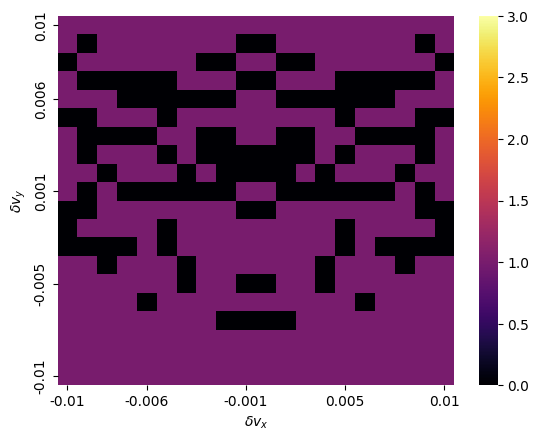

In [23]:
import seaborn as sns
from matplotlib.colors import ListedColormap


# Create a figure and axis for the heatmap
fig, ax = plt.subplots()

# Create the heatmap using Seaborn
sns.heatmap(stabilities.T,cmap = 'inferno',  cbar=True, ax=ax, vmax = 3)

# Determine the tick positions
num_ticks = 5
tick_positions = np.linspace(0, variances.shape[0] - 1, num_ticks, dtype=int) 

# Set the tick positions and labels for both x-axis and y-axis
ax.set_xticks(tick_positions + 0.5)
ax.set_yticks(tick_positions + 0.5)
ax.set_xticklabels(np.round(exs,3)[tick_positions])
ax.set_yticklabels(np.round(eys,3)[tick_positions])

# Set axis labels and title
ax.set_xlabel(f'$\delta v_x$')
ax.set_ylabel('$\delta v_y$')

colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(0.375 * np.array([1, 3, 5, 7]))
# colorbar.set_ticklabels(['$d > 10$', '$T > {1000}}$', '$h < 0.001$', '$E > 0.01$'])

# Show the plot
plt.show()